# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Exercício 1

1. Simulação com funcionalidades básicas

a) Geração de padrão de bits aleatório

Crie uma função que produza um padrão de bits aleatório de um tamanho específico
(O padrão de bits pode ser codificado como uma sequência de 0s e 1s).

In [2]:

# função para criar um array com n (size) bits
# np.random.randint(0,2) devolve numero inteiro de [0,2[, ou seja, 0 ou 1
def random_bits(size):
    bits_array = [] # array que vai conter o padrão de bits
    for i in range(size):
        bits_array.append(np.random.randint(0,2))
    return bits_array


b) Geração e contagem de tentativas

Crie uma função que gere padrões aleatórios e conte quantas tentativas e quanto tempo demora a gerar o padrão de bits “correto”.

Faça dois gráficos sobre a evolução das tentativas / tempo vs número de bits no padrão (2, 4, 8, 12, 16, ...).

Cada “ponto” no gráfico deve ser um boxplot baseado nos resultados de 30 tentativas.

Utilize um conjunto fixo de sementes para poder reproduzir as experiências.

Pare quando os tempos de execução na sua máquina ultrapassarem 1 hora para recolher os resultados, mesmo que não tenha atingido 16 bits.

Compare a diferença de tentativas e tempos de execução para cada tamanho de padrão.

Nas alíneas seguintes, use o padrão maior que executa em tempo útil.

In [3]:

# função para contagem de tentativas até à certa
def number_of_tries_until_right(right_array):
    number_of_tries = 0
    size = len(right_array)
    random_array = random_bits(size)
    while random_array != right_array:
        number_of_tries +=1
        random_array = random_bits(size)
    return number_of_tries

# Exemplo 
right = [0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0] # vetor com 10 de tamanho
print(f"Tamanho do array: {len(right)} \nNúmero de tentativas: {number_of_tries_until_right(right)}")

Tamanho do array: 16 
Número de tentativas: 32926


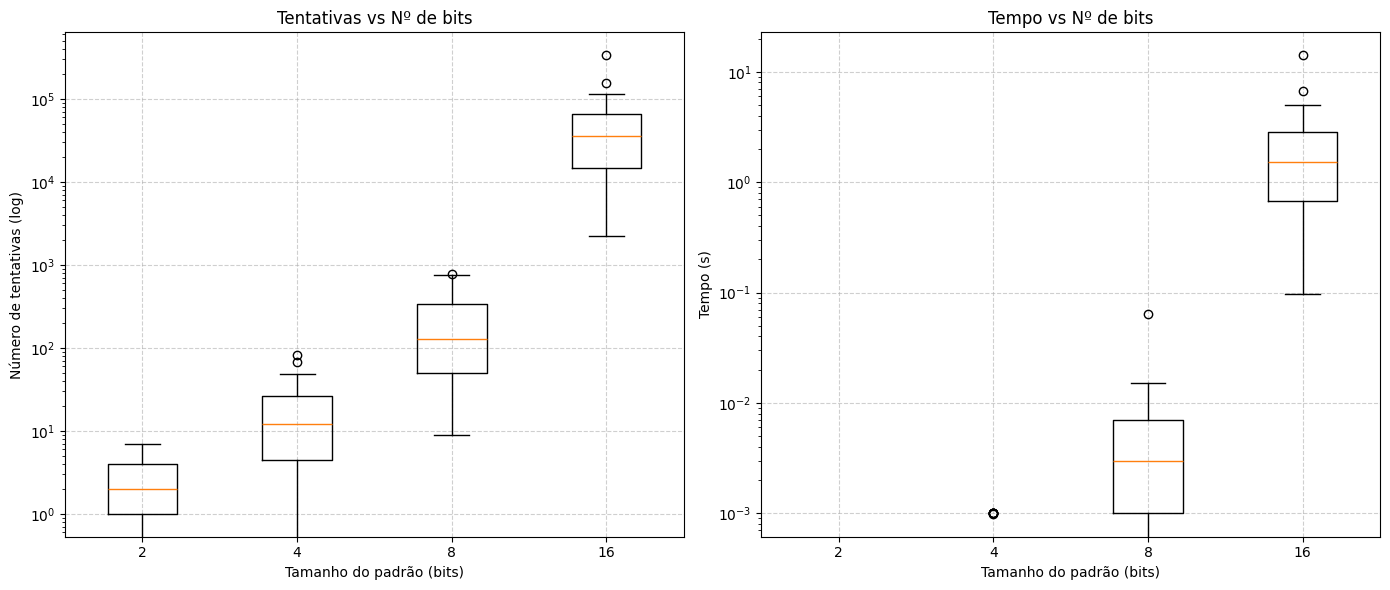

In [4]:
seeds = list(range(30)) # lista das sementes a usar

sizes = [2,4,8,16] # números de bits para o padrão de bits

repetitions = 30 # número de vezes a repetir o processo de todos os bits
rep = 0

all_tries = {} # um mapa para ter todas as tentativas das 30 repetições associadas ao seu size (número de bits)
all_times = {} # um mapa para ter todos os tempos das 30 repetições associadas ao seu size

for size in sizes: # ciclo que percorre os números de bits

    number_of_tries = [] # array que contém os números de tentativas e todas as repetições
    times = [] # array que contém os tempos das repetições

    for rep, seed in enumerate(seeds, start = 1): # ciclo para correr as repetições

        np.random.seed(seed) # usar a nova seed

        right = random_bits(size) # padrão correto

        # contagem do tempo e número das tentativas
        start = time.time()
        tries= number_of_tries_until_right(right)
        end = time.time()

        # adicionar às listas correspondentes
        number_of_tries.append(tries)
        times.append(end - start)

    # adicionar tempos e tentativas correspondentes ao tamanho do padrão usado
    all_tries[size] = number_of_tries
    all_times[size] = times


# ================= Boxplots =================

fig, axs = plt.subplots(1, 2, figsize=(14,6))

# --- BoxPlot Tentativas ---
axs[0].boxplot([all_tries[s] for s in all_tries.keys()], tick_labels=sizes)
axs[0].set_xlabel("Tamanho do padrão (bits)")
axs[0].set_ylabel("Número de tentativas (log)")
axs[0].set_yscale('log')
axs[0].set_title("Tentativas vs Nº de bits")
axs[0].grid(True, linestyle='--', alpha=0.6)

# --- BoxPlot Tempos ---
axs[1].boxplot([all_times[s] for s in all_times.keys()], tick_labels=sizes)
axs[1].set_xlabel("Tamanho do padrão (bits)")
axs[1].set_ylabel("Tempo (s)")
axs[1].set_yscale('log')
axs[1].set_title("Tempo vs Nº de bits")
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



Como podemos observar nos gráficos, à medida que aumentamos o tamanho do padrão de bits, tanto o tempo necessário quanto o número de tentativas para encontrar o padrão correto aumentam significativamente. Esse crescimento é exponencial conforme o padrão se torna maior. Um padrão de 16 bits foi o maior que consegue ser executado dentro de um tempo útil/aceitável. Por isso, serão utilizados apenas padrões de 16 bits.

=====================================================================================

c) Função de fitness

Crie uma função que mede a fitness (aptidão) do padrão adivinhado.
Essa função deve ter um valor máximo quando o padrão adivinhado coincide exatamente com o padrão “correto” e diminuir à medida que a distância entre os padrões aumenta.

In [5]:
# função para o fitness de padrões com mesmo tamanho
# visto a simplicidade do problema o fitness, neste caso, corresponde à percentagem de bits certos do total de bits
def fitness(right, tested):
    number_of_right_bits = 0
    for i in range(len(right)):
        if right[i]==tested[i]:
            number_of_right_bits +=1
    return number_of_right_bits/len(right)

# Exemplo
right = [0,1,1,1,1,0,0,1,0,0,1,1,0,1,0,0]
tested = [0,0,1,0,1,1,1,0,0,1,1,1,0,0,1,1]
print(fitness(right, tested))


0.4375


d) Mutação de padrões

Crie uma função para mutar (inverter um bit) de um dado padrão.
Utilize esta função num ciclo em que a alteração só é aceite se gerar uma solução melhor (ou seja, com maior aptidão).

Pare após 1000 mutações ou quando o padrão gerado pela mutação for igual à solução.
Verifique: converge sempre para a solução correta?

In [7]:
# =================================== Mutação de um número  de bits aleatório ou só um ===================================

# função para mutar aleatoriamente um dos bits
# a função inverte um bit, ou seja se for 0 passa a 1 e se for 1 passa a 0
def mutate_bits(to_be_mutated, only_one_bit):
    mutant = to_be_mutated.copy()
    
    # mutar só um bit
    if only_one_bit == True:

        index = np.random.randint(0,len(to_be_mutated))

        if mutant[index] == 0:
            mutant[index] = 1
        elif mutant[index]== 1:
            mutant[index] = 0
        return mutant
    
    else: # mutar vários bits 

        # O nº de bits é escolhido aleatóriamente entre 1 e 0.80*tamanho do padrão. 
        # Para garantir que os bits não são todos invertidos.
        number_of_bits = np.random.randint(1,int(len(to_be_mutated)*0.80))

        # bits a ser mudados. A escolha é aleatória
        indexes = np.random.choice(len(to_be_mutated), size=number_of_bits, replace=False)

        for i in indexes:
            if mutant[i] == 0:
                mutant[i] = 1
            elif mutant[i] == 1:
                mutant[i] = 0

        return mutant



# Exemplo

unmutated = [0,0,1,0,1,0,1,1]
mutated = mutate_bits(unmutated, only_one_bit=False)

print(f"Original : {unmutated}\nMutante :  {mutated}")

# =================================== Mutação Uniforme ===================================

# mutação com probabilidade para cada bit ser mutado ou não.
def mutate_uniformly(to_be_mutated):

    mutant = to_be_mutated.copy()

    prob_mutation = 0.3 # probabilidade de ocorrer

    # ciclo que muda os bits
    for i in range(len(to_be_mutated)):
        prob = np.random.random()

        if prob <= prob_mutation:
            if mutant[i] == 0:
                mutant[i] = 1
            else:
                mutant[i] = 0

    return mutant



# =================================== Ciclo das 1000 mutações ===================================

max_mutations = 1000

original = [0,0,1,0,0,0,1,1,0,1,1,0,0,0,1,0]

#to_be_mutated = [1,0,0,1,0,1,1,1,0,1,0,1,1,0,0,0]

# função para correr o método com mutação
# Se não chegar ao certo dentro de 1000 mutações devolve -1, caso contrário devolve o nº de mutações
def mutations_method(max_mutations, right, mutation):

    to_be_mutated = random_bits(len(right))

    for m in range(max_mutations): # correr no máximo max_mutations

        # escolha de qual mutação usar
        if mutation == -1:
            mutant = mutate_uniformly(to_be_mutated)
        elif mutation == 0:
            mutant = mutate_bits(to_be_mutated, False)
        else:
            mutant = mutate_bits(to_be_mutated, True)

        # se a mutante for melhor que a anterior, muda para essa. Se não for continua a repetir
        if fitness(right, mutant) > fitness(right, to_be_mutated):
            to_be_mutated = mutant.copy()
        if fitness(right, to_be_mutated) == 1.0:
            #print(f"Mutação perfeita encontrada em {m} mutações\nOriginal : {right}\nMutated :  {to_be_mutated}")
            return m
        
    # em caso de não encontrar solução
    return -1

# ==================== Importante! ====================   
# a mutação é escolhida da seguinte forma:
# mutation = -1 -> mutação uniforme 
# mutation = 0 -> mutação de um número aleatório de bits
# mutation >=1 -> mutação só de um bit

number_of_bits = 0
print(f"Mutação perfeita encontrada em {mutations_method(max_mutations, original, number_of_bits)} mutações")



Original : [0, 0, 1, 0, 1, 0, 1, 1]
Mutante :  [1, 0, 0, 0, 0, 0, 0, 1]
Mutação perfeita encontrada em 276 mutações


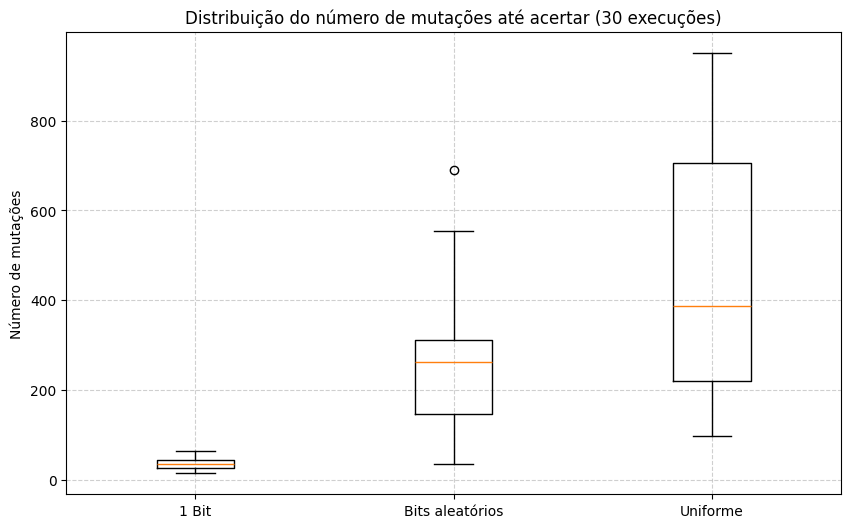

In [8]:
# ===================== Correr testes =====================

number_of_tests = 30
max_mutations = 1000
right = [0,0,1,0,0,0,1,1,0,1,1,0,0,0,1,0]

mut1_results, random_results, uniform_results = [], [], []

for i in range(number_of_tests):
    np.random.seed(i)
    mut1_results.append(mutations_method(max_mutations, right, mutation=1))
    random_results.append(mutations_method(max_mutations, right, mutation=0))
    uniform_results.append(mutations_method(max_mutations, right, mutation=-1))


# ===================== Descontar as falhas =====================

mut1_results = [r for r in mut1_results if r != -1]
random_results = [r for r in random_results if r != -1]
uniform_results = [r for r in uniform_results if r != -1]


# ===================== Fazer BoxPlot =====================

plt.figure(figsize=(10,6))
plt.boxplot(
    [mut1_results, random_results, uniform_results],
    tick_labels=['1 Bit', 'Bits aleatórios', 'Uniforme'],
    showfliers=True
)
plt.title("Distribuição do número de mutações até acertar (30 execuções)")
plt.ylabel("Número de mutações")
#plt.yscale('log')  # opcional — ajuda a visualizar melhor os dados quando existem grandes diferenças
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Entre os três tipos de mutação analisados, a mutação de apenas um bit mostrou ser a mais eficaz. Portanto, a partir deste ponto, será utilizada exclusivamente a mutação de um bit.

=====================================================================================

2. População e evolução por mutação

Gere um conjunto aleatório de padrões (por exemplo, uma população de 100 padrões) e avalie cada um deles.

Selecione os 30% melhores e, com base neles, gere por mutação um novo conjunto de 100 padrões:

30% da antiga população correspondem aos 30% melhores;

Os 70% restantes são gerados por mutação.

Repita o processo até que a melhor avaliação estagne.

Compare de forma justa os métodos de pesquisa testados até agora, incluindo os tempos de execução.

Utilize sempre 30 testes para cada resultado.

Utilize boxplots com bigodes para comparar a distribuição dos resultados dos vários testes.


In [ ]:
# =============================== Funções auxiliares ===============================

# função para criar N sequencias/padrões de bits, com número de bits dado
def make_N_sequences_of_bits(number_of_Bits, amount):
    sequences = []
    for i in range(amount):
        sequences.append(random_bits(size=number_of_Bits))
    
    return sequences

# função que cria um array com os fitness de todos os padrões do set
def fitness_array_create(set, right):
    array = []
    for i in set:
        array.append(fitness(right, i))
    return array

# função para buscar os melhores de um dado conjunto
def choose_best(percentage_of_choice, full_set, right):
    best_array = []
    fitness_array = [] # array que contem o fitness de cada padrao do set

    # ciclo que cria o array de fitness
    fitness_array = fitness_array_create(full_set,right)

    # percentagem que vão ser escolhidos, neste caso corresponde a um número inteiro, pois é um array
    k = round(len(full_set)* percentage_of_choice)

    # escolher os indices dos melhores fitness, que corresponde ao indice do padrao correspondente no full_set
    # a função np.argsort() ordena de forma crescente, e [::-1] faz com que o array inverta a ordem e transforma em decrescente e assim vamos buscar os k primeiros (os melhores)
    indexes_of_best = np.argsort(fitness_array)[::-1][:k]

    # buscar os melhores
    for i in indexes_of_best:
        best_array.append(full_set[i])
    
    return best_array


# função para criar um novo conjunto com mutação e com base em/e incluindo os padrões dados
def create_new(initial_sequences, size_of_new):
    new_set = initial_sequences.copy()

    while len(new_set) < size_of_new:
        i = np.random.randint(0, len(initial_sequences))
        new = mutate_bits(initial_sequences[i], only_one_bit=True)
        new_set.append(new)

    return new_set


def run_best_and_mutation(N_bits, size_of_set, percentage_of_choice_best,right):
    set_of_sequences = make_N_sequences_of_bits(N_bits, size_of_set)
    rep = 0

    fitness_array = fitness_array_create(set_of_sequences, right)
    
    while max(fitness_array) < 1.0 and rep < 100:
        #escolher melhores candidatos
        best = choose_best(percentage_of_choice_best, set_of_sequences, right)

        set_of_sequences = create_new(best, size_of_set)

        fitness_array = fitness_array_create(set_of_sequences, right)

        rep +=1
    #print(f"Número de repetições até encontrar a certa : {rep}")

    return rep





In [10]:
# Exemplo
N_bits = 16
size_of_set = 100
percentage_of_choice_best = 0.30

original = [0,0,1,0,0,0,1,1,0,1,1,0,0,0,1,0]
print(f"Número de populações até encontrar a certa do método Best + Mutation : {run_best_and_mutation(N_bits,size_of_set,percentage_of_choice_best,original)}")


Número de populações até encontrar a certa do método Best + Mutation : 6


Compare de forma justa os métodos de pesquisa testados até agora, incluindo os tempos de execução.

Utilize sempre 30 testes para cada resultado.

Utilize boxplots com bigodes para comparar a distribuição dos resultados dos vários testes.

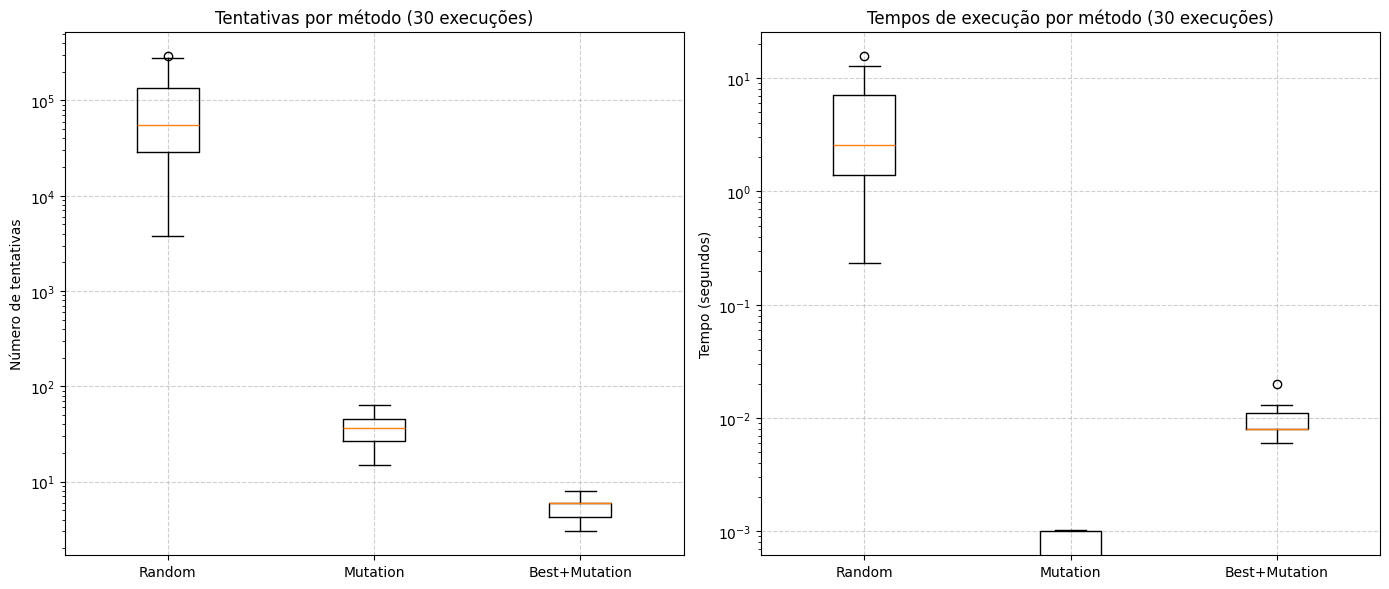

In [11]:

number_of_tests = 30

right = [0,0,1,0,0,0,1,1,0,1,1,0,0,0,1,0] # padrão correto

seeds = list(range(number_of_tests)) # seeds a usar

# arrays que vão conter as tentativas e os tempos das tentativas
random_method_tries = []
mutation_method_tries = []
best_and_mutated_method_tries = []

random_method_time = []
mutation_method_time = []
best_and_mutated_time = []


# ciclo para correr as 30 tentativas
for i, seed in enumerate(seeds, start = 1):
    #print(f"Teste {i+1}/{number_of_tests}")

    # garantir que a seed usada é a mesma para todos os métodos
    # o comando é repetido antes de cada método começar
    np.random.seed(seed) 

    # ---------- Método 1: Random ----------
    start = time.time()
    rmt = number_of_tries_until_right(right)
    end = time.time()
    random_method_tries.append(rmt)
    random_method_time.append(end - start)

    # ---------- Método 2: Mutations ----------
    np.random.seed(seed)

    start = time.time()
    mtt = mutations_method(1000, right, mutation= 1)
    end = time.time()
    mutation_method_tries.append(mtt)
    mutation_method_time.append(end - start)

    # ---------- Método 3: Best + Mutation ----------
    np.random.seed(seed)

    start = time.time()
    bmm = run_best_and_mutation(N_bits,size_of_set,percentage_of_choice_best,right)
    end = time.time()
    best_and_mutated_method_tries.append(bmm)
    best_and_mutated_time.append(end - start)



fig, axs = plt.subplots(1, 2, figsize=(14,6))

# ===================== BoxPlot Tentativas =====================
axs[0].boxplot(
    [random_method_tries, mutation_method_tries, best_and_mutated_method_tries],
    tick_labels=['Random', 'Mutation', 'Best+Mutation'],
    showfliers=True
)
axs[0].set_title("Tentativas por método (30 execuções)")
axs[0].set_ylabel("Número de tentativas")
axs[0].set_yscale('log')
axs[0].grid(True, linestyle='--', alpha=0.6)

# ===================== BoxPlot Tempos =====================
axs[1].boxplot(
    [random_method_time, mutation_method_time, best_and_mutated_time],
    tick_labels=['Random', 'Mutation', 'Best+Mutation'],
    showfliers=True
)
axs[1].set_title("Tempos de execução por método (30 execuções)")
axs[1].set_ylabel("Tempo (segundos)")
axs[1].set_yscale('log')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Como podemos observar, apesar de demorar mais tempo do que o método Mutation, o Best+Mutation é o melhor dos três, pois necessita de menos tentativas para encontrar a solução correta. 
Está abaixo da casa das $10^1$ tentativas em quanto que o random está nas $10^4$ a $10^5$ e o mutation entre $10^1$ e $10^2$ tentativas.

=====================================================================================

3. Cruzamento de padrões

Conceba um procedimento de cruzamento para este tipo de padrão.
Proceda de modo idêntico ao indicado na alínea anterior (usando mutação e seleção, mas agora com cruzamento entre padrões).

In [ ]:
# função de crossover para o mesmo tamanho de padrão
def crossover(sequence1, sequence2):
    length = len(sequence1)

    divison = np.random.randint( int(length*0.20), int(length*0.80))

    if length == len(sequence2):

        first_part = sequence1[:divison]

        second_part = sequence2[divison:]
        return first_part + second_part

# =============================== Função auxiliar ===============================

# função que cria nova população com base numa já dada e com crossover
def create_new_set_with_crossover(initial_sequences, size_of_new):
    new_set = initial_sequences.copy()

    while len(new_set) < size_of_new:
        i = np.random.randint(0, len(initial_sequences))
        j = np.random.randint(0, len(initial_sequences))

        # garantir que os padrões selecionados não são os mesmos
        while j == i:
            j = np.random.randint(0, len(initial_sequences))

        new = crossover(initial_sequences[i], initial_sequences[j])
        new_set.append(new)

    return new_set

# ==============================================================

# função para correr o método do crossover
def run_crossover_method(right):
    set_of_sequences = make_N_sequences_of_bits(N_bits, size_of_set)
    rep = 0

    fitness_array = fitness_array_create(set_of_sequences, right)


    #fitness_array.sort(reverse=True)
    
    # ciclo só para (de parar) se encontrar uma solução correta ou fazer no máximo 1000 repetições
    while max(fitness_array) < 1.0 and rep < 1000 :
        # escolher melhores candidatos
        best = choose_best(percentage_of_choice_best, set_of_sequences, right)

        set_of_sequences = create_new_set_with_crossover(best, size_of_set)

        fitness_array = fitness_array_create(set_of_sequences, right)

        rep +=1
    #print(f"Número de repetições até encontrar a certa : {rep}")

    # se não conseguir encontrar solução devolve o melhor fitness encontrado
    if rep < 1000:
        return rep
    else:
        return max(fitness_array)


A correr 30 testes do método de crossover...

Teste 1/30... Encontrou em 4 gerações (0.014 s)
Teste 2/30... Encontrou em 3 gerações (0.008 s)
Teste 3/30... Encontrou em 6 gerações (0.011 s)
Teste 4/30... Encontrou em 4 gerações (0.008 s)
Teste 5/30... Encontrou em 7 gerações (0.017 s)
Teste 6/30... Encontrou em 4 gerações (0.007 s)
Teste 7/30... Encontrou em 3 gerações (0.006 s)
Teste 8/30... Encontrou em 2 gerações (0.007 s)
Teste 9/30... Encontrou em 3 gerações (0.006 s)
Teste 10/30... Encontrou em 3 gerações (0.014 s)
Teste 11/30... Encontrou em 5 gerações (0.012 s)
Teste 12/30... Encontrou em 5 gerações (0.008 s)
Teste 13/30... Encontrou em 5 gerações (0.010 s)
Teste 14/30... Encontrou em 3 gerações (0.006 s)
Teste 15/30... Encontrou em 4 gerações (0.008 s)
Teste 16/30... Encontrou em 2 gerações (0.006 s)
Teste 17/30... Encontrou em 4 gerações (0.007 s)
Teste 18/30... Encontrou em 3 gerações (0.008 s)
Teste 19/30... Encontrou em 3 gerações (0.006 s)
Teste 20/30... Encontrou em 4 ge

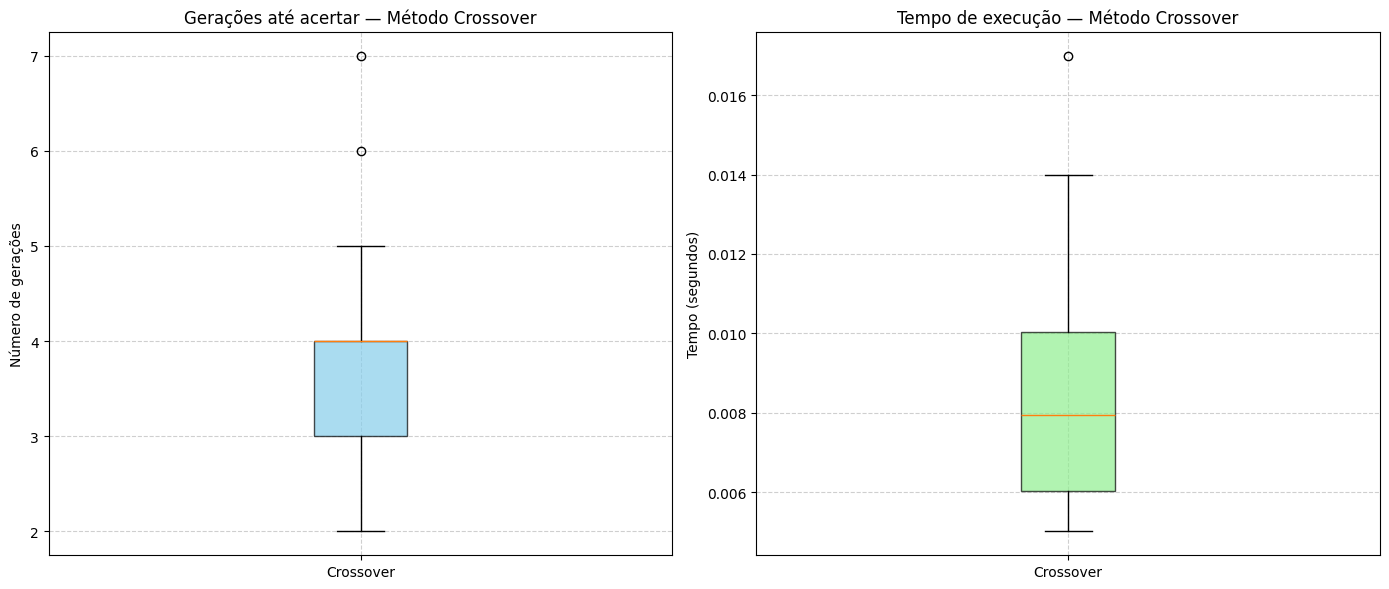

In [17]:

# Parâmetros fixos
number_of_tests = 30
right = [0,0,1,0,0,0,1,1,0,1,1,0,0,0,1,0]

percentage_of_choice_best = 0.30

crossover_method_tries = []
crossover_method_time = []

print("A correr 30 testes do método de crossover...\n")

# ciclo para correr o método
for i, seed in enumerate(seeds, start=1):
    print(f"Teste {i}/{number_of_tests}... ", end="")

    # uma seed diferente para cada teste se não os resultados seriam quase sempre o mesmo
    np.random.seed(seed)

    start = time.time()

    rep = run_crossover_method(right)  # executa o método

    end = time.time()
    elapsed = end - start

    # verificação se encontrou o melhor dentro do máximo de 1000 possíveis gerações 
    # e só adiciona as listas para o boxplot se encontrou solução 
    if rep < 1.0:
        print(f"Não encontrou solução após 1000 gerações, melhor fitness foi {rep} (tempo: {elapsed:.3f} s)")
    else:
        print(f"Encontrou em {rep} gerações ({elapsed:.3f} s)")
        crossover_method_tries.append(rep)
        crossover_method_time.append(elapsed)

# ================================
#  Filtragem de resultados
# ================================

valid_results = len(crossover_method_tries)
print(f"\nForam obtidos {valid_results}/{number_of_tests} resultados válidos.")

if valid_results == 0:
    print("Nenhuma execução encontrou a solução. Boxplot não será gerado.")
else:
    # ========================== FIGURA COM 2 BOXPLOTS LADO A LADO ==========================
    fig, axs = plt.subplots(1, 2, figsize=(14,6))

    # ---------------------- BoxPlot: Número de Gerações ----------------------
    axs[0].boxplot(
        crossover_method_tries,
        tick_labels=["Crossover"],
        vert=True,
        patch_artist=True,
        boxprops=dict(facecolor='skyblue', alpha=0.7)
    )
    axs[0].set_title("Gerações até acertar — Método Crossover")
    axs[0].set_ylabel("Número de gerações")
    axs[0].grid(True, linestyle='--', alpha=0.6)

    # ---------------------- BoxPlot: Tempo de Execução ----------------------
    axs[1].boxplot(
        crossover_method_time,
        tick_labels=["Crossover"],
        vert=True,
        patch_artist=True,
        boxprops=dict(facecolor='lightgreen', alpha=0.7)
    )
    axs[1].set_title("Tempo de execução — Método Crossover")
    axs[1].set_ylabel("Tempo (segundos)")
    axs[1].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()



Comparando com os resultados dos outros métodos, o Crossover mostra-se superior, sendo mais eficiente e rápido a encontrar a solução.

=====================================================================================

## Exercício 2

Altere a função de avaliação, mutação e cruzamento para lidar com um problema semelhante em que o tamanho do padrão de bits alvo fosse desconhecido (entre 2 e 32)

In [23]:

# =========================================================================
#  Avaliação (Fitness) 
# =========================================================================

# função de fitness considerando diferentes tamanhos de padrões
def fitness_with_unknown_size(right, candidate, alpha):

    common_size = min(len(right), len(candidate))
    
    #contagem de número de bits certos, só no tamanho em comum
    right_bits = 0
    for i in range(common_size):
        if candidate[i] == right[i]:
            right_bits += 1

    # percentagem de bits certos dentro dos bits em comum
    percentage_of_right = right_bits/ common_size

    # comparar os tamanhos
    size_compare = abs(len(right) - len(candidate))/ len(right)

    # calculo do fitness com base no número de bist certos e tamnho do candidato. 
    # alpha é a importância que damos à diferença de tamanho
    fitness_value = percentage_of_right / (1 + alpha * size_compare)

    return round(fitness_value, 4)

# Exemplo

right = [0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0]

candidate = [0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0]

print(fitness_with_unknown_size(right, candidate, 0.45))


# =========================================================================
#  Mutação 
# =========================================================================
    
def mutation_with_unknown_size(to_be_mutated):
    chance = np.random.randint(0,9)
    mutant = to_be_mutated.copy()

    # agora há 3 coisas que pode fazer, adicionar um bit, remover um bit ou "flipar" um bit

    if 2 < len(to_be_mutated) < 32:
        if chance < 3:
            mutant.append(np.random.randint(0,2))
        elif chance < 6:
            mutant.pop(np.random.randint(0, len(mutant)))
        elif chance < 9:
            mutant = mutate_bits(mutant, only_one_bit=True)
    else:
        mutant = mutate_bits(mutant, only_one_bit=True)

    return mutant

# =========================================================================
#  Crossover 
# =========================================================================

def crossover_with_unknown_size(sequence1, sequence2):
    length1 = len(sequence1)
    length2 = len(sequence2)

    divison1 = np.random.randint( int(length1*0.20), int(length1*0.80))
    divison2 = np.random.randint( int(length2*0.20), int(length2*0.80))
    
    new = sequence1[:divison1]

    # ciclo para garantir que as sequencias criadas tem tamanhos pertencentes a [2,32]
    i=divison2
    while i < length2 and (divison2+i) <32:
        new.append( sequence2[i])
        i += 1

    return new

# Exemplo

sequence1 = [0,0,1,0,1,0,1,0,1,0,1,0,1]

sequence2 = [0,1,0,1,1]

crossover_with_unknown_size(sequence1, sequence2)



0.7175


[0, 0, 1, 0, 1, 0, 1, 0, 1, 1]

In [15]:
# =============================== Funções auxiliares ===============================

# função que cria um array de fitness para o caso dos tamanhos serem aleatórios
def fitness_array_create_with_unknown_size(set, right, alpha):
    array = []
    for i in set:
        array.append(fitness_with_unknown_size(right, i, alpha))
    return array

# função para buscar os melhores de um dado conjunto
def choose_best_with_unknown_size(percentage_of_choice, full_set, right, alpha):
    best_array = []
    fitness_array = [] # array que contem o fitness de cada padrão do set

    # ciclo que cria o array de fitness
    fitness_array = fitness_array_create_with_unknown_size(full_set,right, alpha)

    # percentagem que vão ser escolhidos, neste caso corresponde a um número inteiro, pois é um array
    k = round(len(full_set)* percentage_of_choice)

    # escolher os indices dos melhores fitness, que corresponde ao indice do padrao correspondente no full_set
    # a função np.argsort() ordena de forma crescente, e [::-1] faz com que o array inverta a ordem e transforma em decrescente e assim vamos buscar os k primeiros (os melhores)
    indexes_of_best = np.argsort(fitness_array)[::-1][:k]

    # buscar os melhores
    for i in indexes_of_best:
        best_array.append(full_set[i])
    
    return best_array

# função para criar novo set usando mutação
def create_new_with_mutation2(initial_sequences, size_of_new):
    new_set = initial_sequences.copy()

    while len(new_set) < size_of_new:
        i = np.random.randint(0, len(initial_sequences))
        new = mutation_with_unknown_size(initial_sequences[i])
        new_set.append(new)

    return new_set


# ===============================================================================

# função para correr o exercicio 2 só com mutação
def run_exercise2_mutation(right, alpha):
    set_of_sequences = []

    # criar a população inicial, neste caso 100 padrões
    for i in range(100):
        size = np.random.randint(2, 33)        
        set_of_sequences.append(random_bits(size))

    # buscar os 30% melhores
    fitness_array = fitness_array_create_with_unknown_size(set_of_sequences, right, alpha)

    rep = 0

    # ciclo só  se encontrar uma solução correta ou fazer no máximo 1000 repetições
    while max(fitness_array) < 1.0 and rep < 1000:
    
        best = choose_best_with_unknown_size(0.30, set_of_sequences, right, alpha)

        set_of_sequences = create_new_with_mutation2(best, 100)

        fitness_array = fitness_array_create_with_unknown_size(set_of_sequences, right, alpha)

        rep +=1

    return rep







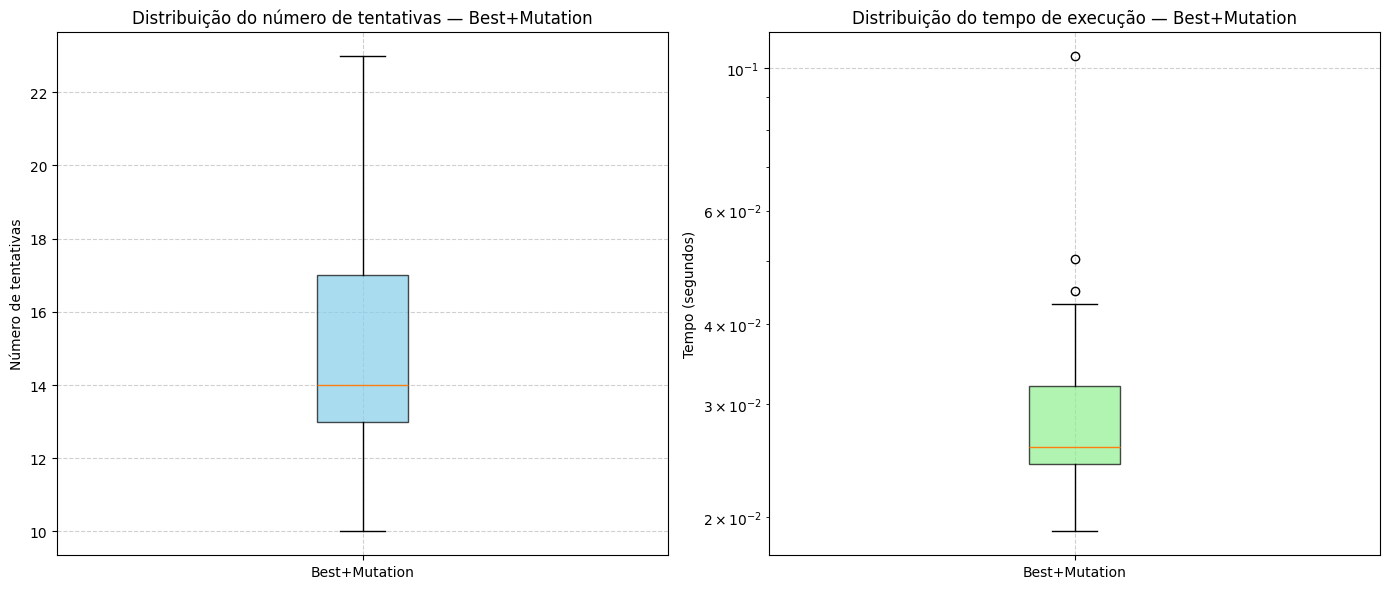

In [16]:
# Arrays e valores fixos
best_and_mutated_method_tries = []
best_and_mutated_time = []

number_of_tests = 30
alpha = 0.45

right = [0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]

# correr só com mutação
for i, seed in enumerate(seeds, start=1):

    np.random.seed(seed)

    # ---------- Método 3: Best + Mutation ----------
    start = time.time()
    bmm = run_exercise2_mutation(right, alpha)
    end = time.time()
    best_and_mutated_method_tries.append(bmm)
    best_and_mutated_time.append(end - start)

    
# ==================== Boxplots lado a lado ====================

fig, axs = plt.subplots(1, 2, figsize=(14,6))

# ---------------------- BoxPlot: Tentativas ----------------------
axs[0].boxplot(
    best_and_mutated_method_tries,
    tick_labels=['Best+Mutation'],
    showfliers=True,
    patch_artist=True,
    boxprops=dict(facecolor='skyblue', alpha=0.7)
)
axs[0].set_title("Distribuição do número de tentativas — Best+Mutation")
axs[0].set_ylabel("Número de tentativas")
axs[0].grid(True, linestyle='--', alpha=0.6)


# ---------------------- BoxPlot: Tempo ----------------------
axs[1].boxplot(
    best_and_mutated_time,
    tick_labels=['Best+Mutation'],
    showfliers=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', alpha=0.7)
)
axs[1].set_title("Distribuição do tempo de execução — Best+Mutation")
axs[1].set_ylabel("Tempo (segundos)")
axs[1].set_yscale('log')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
    

# Exercício 3
Explique as alterações que seriam necessárias na função de avaliação, mutação e cruzamento para lidar com um problema semelhante em que o padrão fosse de dígitos decimais e não binários.
Recomendação: se tentar implementar as suas ideias para perceber melhor as alterações a fazer inclua o código na submissão




Resposta:

Tanto o cruzamento como a mutação seriam iguais, sendo a única diferença na mutação, que em vez de "flipar" o bit, agora seria gerar um número aleatório de 0 a 9.

Já a avaliação (fitness), é a que precisaria de uma mudança mais drástica pois o cálculo do fitness teria de mudar. Até agora era feito (por escolha própria) um cálculo considerando o número de bits certos e o rácio entre o tamanho do certo e o candidato:

$$
fitness = \frac{accuracy}{1+alpha*size\_ratio}
$$

$$
accuracy = \frac{Número\_Bits\_Certos(em\_comum)}{Número\_total\_bits(em\_comum)}\qquad

size\_ratio = \lvert \frac{Tamanho\_right - Tamanho\_candidato}{Tamanho\_right} \rvert
$$

O "right" é o padrão objetivo, quele que queremos ter/chegar.
O alpha equivale à "importância" que damos à diferença do tamanho. Multiplicamos por alpha porque se só usarmos o size_ratio por vezes pode ter bits certos mas como a diferença de tamanho é grande o fitness poderia ser 0, o que não faz muito sentido tendo em conta a existência de bits certos. Daí o uso do alpha para controlar melhor a influência que o tamanho tem no fitness.

Agora, tendo em conta a mudança de números binários para números decimais, o cálculo de número de bits certos não funcionaria, em vez disso teriamos de calcular a distância a que todos os números estão do número correto, faziamos uma média de todas e usavamos essa média para encorporar no fitness. Ou seja o accuracy passava a ser:

$$
accuracy = 1 - \frac{Média\_diferenca}{9}
$$

$$
Média\_diferenca = \frac{sum\_diferencas}{Número\_de\_bits\_em\_comum}\qquad

sum\_diferencas = \sum_{i=0}^{n} \lvert right[i] - candidato[i] \rvert, \text{ n -> tamanho em comum}
$$

In [47]:
def random_dec(size):
    dec_array = [] # array que vai conter o padrão de bits
    for i in range(size):
        dec_array.append(np.random.randint(0,10))
    return dec_array

# Exemplo
padrao = random_dec(5)
print(padrao)

[7, 5, 8, 5, 0]


In [ ]:
#funcao de fitness que calcula o numero de decimais certos bem como a distancia entre o decimal candidato e o decimal certo
def fitness_dec(individuo, alvo) -> float:
    """
    Fitness normalizado entre 0 e 1.
    1 significa padrão idêntico ao alvo.
    """
    # Soma das diferenças absolutas
    erro_total = sum(abs(int(x) - int(y)) for x, y in zip(individuo, alvo))
    # Média das diferenças
    erro_medio = erro_total / len(alvo)
    # Normalizar entre 0 e 1
    fitness_score = 1 - (erro_medio / 9)  # 9 é a diferença máxima entre dígitos
    return fitness_score

padrao_exemplo = random_dec(5)
fitnes = fitness_dec(padrao,padrao_exemplo)
print(f"padrao: {padrao} | padrao_exemplo: {padrao_exemplo}, fitness: {fitnes}")

padrao: [7, 5, 8, 5, 0] | padrao_exemplo: [2, 0, 2, 9, 5], fitness: 0.4444444444444444
